In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import os

In [74]:
raw_data = pd.read_csv('./Dataset/xor.csv')
input = raw_data.iloc[:,0:2]
output = raw_data.iloc[:,2]
x = np.array(raw_data.iloc[:,0:3])
y = np.array(output)

# 1-CV

In [98]:
##dividing data into train and test
x_1,x_test,y_1,y_test = train_test_split(input,output,test_size=0.3,random_state=0)

##dividing train data into train and CV data
x_tr,x_cv,y_tr,y_cv = train_test_split(x_1,y_1,test_size=0.3,random_state=0)

K = np.arange(1,30,2)
cv_err =[]
tr_err = []
for i in range(1,30,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    
    pred_cv = knn.predict(x_cv)
    pred_tr = knn.predict(x_tr)
    
    acc_cv = accuracy_score(y_cv,pred_cv,normalize = 100) * 100
    acc_tr = accuracy_score(y_tr,pred_tr,normalize = 100) * 100
    print('Cross Validation Accuracy for K='+ str(i) + ' is ' + str(acc_cv)+'%')
    
    cv_error = 1 - acc_cv/100
    tr_error = 1 - acc_tr/100
    
    cv_err.append(cv_error)
    tr_err.append(tr_error)
  
print('\n\nOptimal value of K is', K[cv_err.index(min(cv_err))] )

Cross Validation Accuracy for K=1 is 96.19047619047619%
Cross Validation Accuracy for K=3 is 95.23809523809523%
Cross Validation Accuracy for K=5 is 96.19047619047619%
Cross Validation Accuracy for K=7 is 97.14285714285714%
Cross Validation Accuracy for K=9 is 96.19047619047619%
Cross Validation Accuracy for K=11 is 95.23809523809523%
Cross Validation Accuracy for K=13 is 94.28571428571428%
Cross Validation Accuracy for K=15 is 93.33333333333333%
Cross Validation Accuracy for K=17 is 93.33333333333333%
Cross Validation Accuracy for K=19 is 94.28571428571428%
Cross Validation Accuracy for K=21 is 94.28571428571428%
Cross Validation Accuracy for K=23 is 94.28571428571428%
Cross Validation Accuracy for K=25 is 94.28571428571428%
Cross Validation Accuracy for K=27 is 94.28571428571428%
Cross Validation Accuracy for K=29 is 90.47619047619048%


Optimal value of K is 7


C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


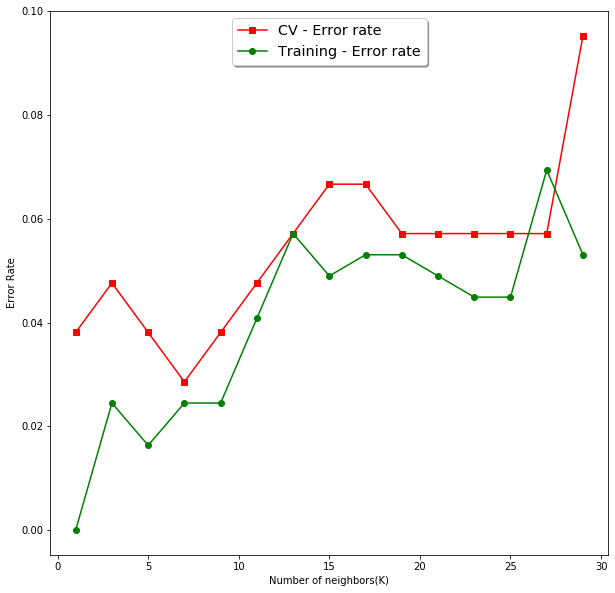

In [99]:
fig,ax = plt.subplots(1,figsize=(10,10))

ax.plot(K,cv_err,'rs-',label='CV - Error rate')
ax.plot(K,tr_err,'go-',label='Training - Error rate')
ax.set_xlabel('Number of neighbors(K)')
ax.set_ylabel('Error Rate')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('C0')

fig.show()

In [77]:
print('Best value of K is 7')
print('Calculating Test accuracy on 7')
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_tr,y_tr)
pred_test = knn.predict(x_test)
test_acc = accuracy_score(y_test,pred_test,normalize=True)
print('Test Accuracy for K='+ str(7) + ' is ' + str(test_acc*100)+'%')

Best value of K is 7
Calculating Test accuracy on 7
Test Accuracy for K=7 is 98.0%


# 10 fold CV



Optimal value of K is 3


Text(0, 0.5, 'Error Rate')

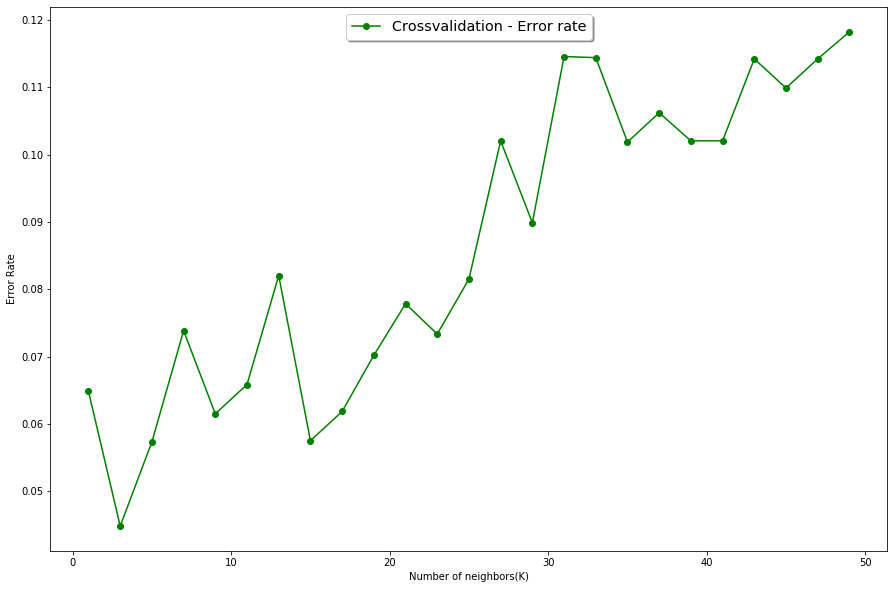

In [108]:
K = np.arange(1,50,2)
cv_acc =[]
tr_acc = []
for i in range(1,50,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,x_tr,y_tr,cv = 10,scoring='accuracy')
    cv_acc.append(scores.mean())

one_array = np.ones(len(cv_acc))
cv_acc = [1 - x for x in cv_acc ]
print('\n\nOptimal value of K is', K[cv_acc.index(min(cv_acc))] )


fig1,ax1 = plt.subplots(1,figsize=(15,10))

ax1.plot(K,cv_acc,'go-',label='Crossvalidation - Error rate')
legend = ax1.legend(loc='upper center', shadow=True, fontsize='x-large')
ax1.set_xlabel('Number of neighbors(K)')
ax1.set_ylabel('Error Rate')

In [107]:
print('Best value of K is 3 according to 10- fold CV')
print('Calculating Test accuracy on 3')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr,y_tr)
pred_test = knn.predict(x_test)
test_acc = accuracy_score(y_test,pred_test)
print('Test Accuracy for K='+ str(3) + ' is ' + str(test_acc*100)+'%')

Best value of K is 3 according to 10- fold CV
Calculating Test accuracy on 3
Test Accuracy for K=3 is 98.0%
